In [14]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

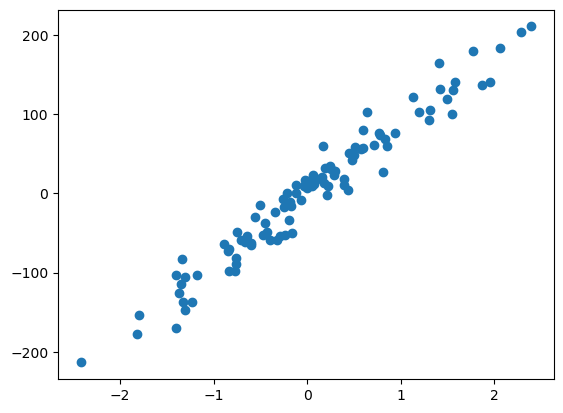

In [3]:
plt.scatter(x,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(x,y)

LinearRegression()

In [8]:
lr.coef_

array([88.88677123])

In [9]:
lr.intercept_

np.float64(-1.240530764584586)

In [10]:
m = lr.coef_

In [24]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = m
        self.b = -120
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slope = -2*np.sum(y-self.m*x.ravel()-self.b)
            self.b = self.b - (self.learning_rate*loss_slope)
            print(loss_slope,self.b)

        print(self.b)

In [29]:
gd = GDRegressor(0.001, 100)

In [30]:
gd.fit(x,y)

-23751.893847083087 -96.2481061529169
-19001.515077666467 -77.24659107525044
-15201.212062133172 -62.04537901311726
-12160.969649706538 -49.884409363410725
-9728.775719765228 -40.1556336436455
-7783.020575812183 -32.37261306783332
-6226.416460649747 -26.146196607183573
-4981.133168519797 -21.165063438663775
-3984.9065348158388 -17.180156903847937
-3187.9252278526706 -13.992231675995267
-2550.340182282137 -11.441891493713129
-2040.2721458257085 -9.40161934788742
-1632.217716660567 -7.769401631226853
-1305.7741733284538 -6.463627457898399
-1044.6193386627626 -5.419008119235636
-835.6954709302103 -4.5833126483054265
-668.5563767441682 -3.9147562715612585
-534.8451013953348 -3.379911170165924
-427.8760811162678 -2.952035089049656
-342.30086489301414 -2.609734224156642
-273.8406919144114 -2.3358935322422307
-219.0725535315292 -2.1168209787107015
-175.25804282522327 -1.9415629358854782
-140.20643426017872 -1.8013565016252995
-112.16514740814284 -1.6891913542171566
-89.73211792651438 -1.59945

# Animations

In [64]:
from sklearn.datasets import make_regression

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [48]:
%matplotlib inline

In [44]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

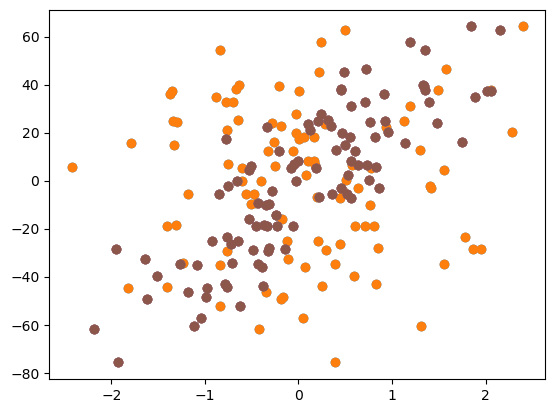

In [45]:
plt.scatter(X,y)
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [65]:
b = -150
m = 27.82
lr = 0.001
all_b = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope = 0
    cost = 0
    for j in range(X.shape[0]):
        slope = slope - 2*(y[j] - (m * X[j]) -  b)
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)
plt.show()

IndexError: list index out of range

In [51]:
all_b = np.array(all_b).ravel()

In [52]:
all_b

array([-120.4588544 ,  -96.82593791,  -77.91960473,  -62.79453818,
        -50.69448494,  -41.01444235,  -33.27040827,  -27.07518102,
        -22.11899921,  -18.15405376,  -14.98209741,  -12.44453232,
        -10.41448025,   -8.7904386 ,   -7.49120528,   -6.45181862,
         -5.62030929,   -4.95510183,   -4.42293586,   -3.99720308,
         -3.65661686,   -3.38414789,   -3.16617271,   -2.99179256,
         -2.85228845,   -2.74068515,   -2.65140252,   -2.57997641,
         -2.52283553,   -2.47712282])

In [53]:
all_cost = np.array(all_cost).ravel()
all_cost

array([2210040.49020261, 1424629.13499295,  921965.86765877,
        600261.37656489,  394370.50226481,  262600.34271276,
        178267.44059944,  124294.38324692,   89751.62654131,
         67644.26224972,   53495.5491031 ,   44440.37268926,
         38645.05978441,   34936.0595253 ,   32562.29935947,
         31043.09285334,   30070.80068942,   29448.5337045 ,
         29050.28283416,   28795.40227714,   28632.27872065,
         28527.87964449,   28461.06423575,   28418.30237416,
         28390.93478274,   28373.41952423,   28362.20975879,
         28355.0355089 ,   28350.44398898,   28347.50541622])

In [63]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

ValueError: x and y must be the same size

In [55]:
# creating a blank window 
# for the animation 
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 2500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation1.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x000001CC2028F560> (for post_execute), with arguments args (),kwargs {}:


NameError: name 'num_epochs' is not defined

In [56]:
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 0)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation2.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x000001CC2028F560> (for post_execute), with arguments args (),kwargs {}:


NameError: name 'num_epochs' is not defined

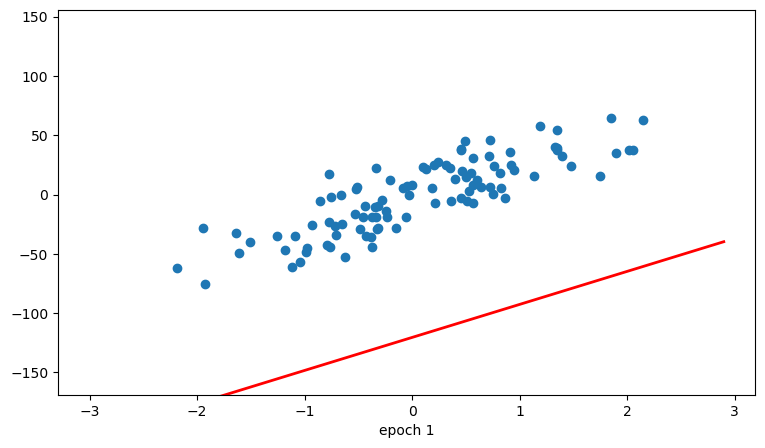

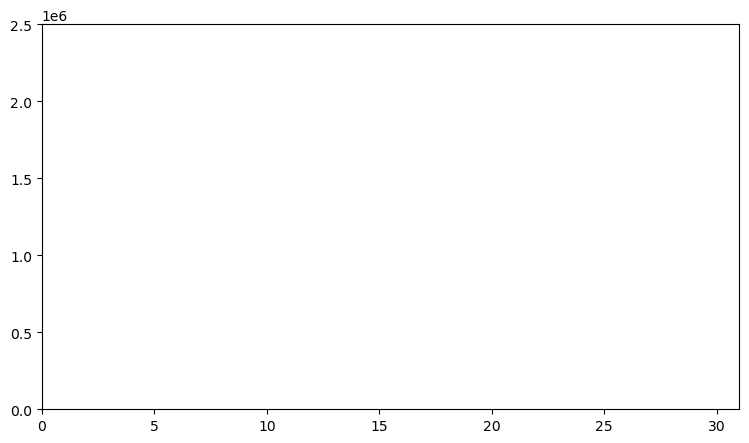

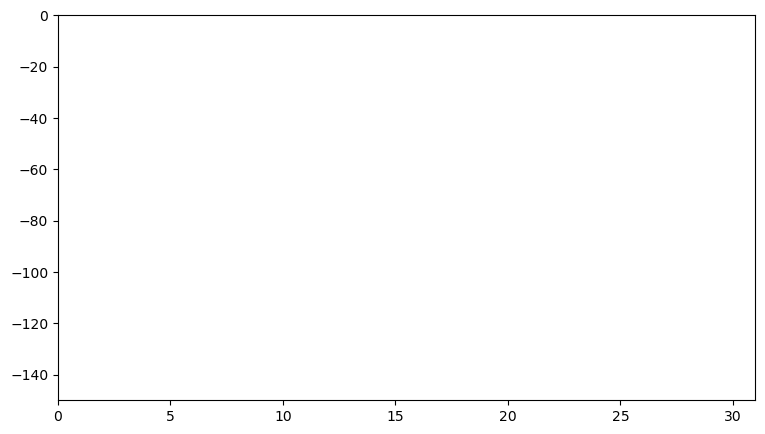

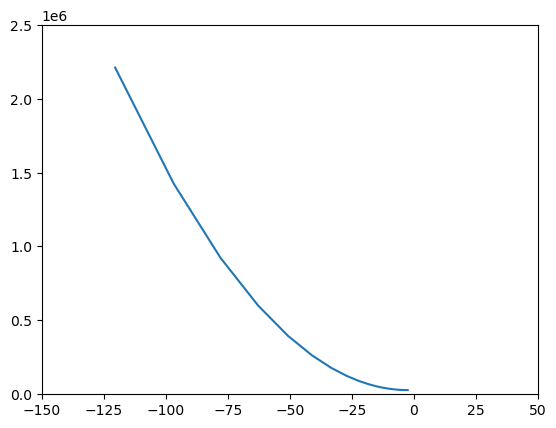

In [57]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-150,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=30, interval=500, repeat=True) 
plt.show()

f = r"animation3.gif" 
writergif = animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)

In [58]:
b_input = np.linspace(-150,150,100)

In [59]:
cost_input = []

for i in range(len(b_input)):
    this_cost = 0 
    for j in range(X.shape[0]):
        this_cost = this_cost + (y[j] - m*X[j] - b_input[i])**2
    #cost_input.append(this_cost)
    print(this_cost)

IndexError: list index out of range